<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/k_means_clustering_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In the notebook "[k_means_clustering_opencv.ipynb](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/k_means_clustering_opencv.ipynb)" we have seen how to apply K-Means clustering algorithm for color quantization using OpenCV. In this notebook, we are going to achieve the same functionality, but using scikit-learn.

Color quantization is the process that can be used to reduce the number of colors in an image while preserving the visual appearance of the image.

K-Means clustering is an unsupervised learning algorithm that automatically clusters data points based on the similarity between them and it can be used for color quantization, where each pixel value of image is clustered. In this sense, ech cluster represents a unique color in the new image. 

# K-Means clustering in scikit-learn for image quantization

Import the required packages:

In [1]:
#Import required packages:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

Get a sample image from the repository of this course:

In [2]:
# Get the image:
!wget "https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/landscape.jpg" -q

Show the image and store its dimensions:

(600, 800, 3)


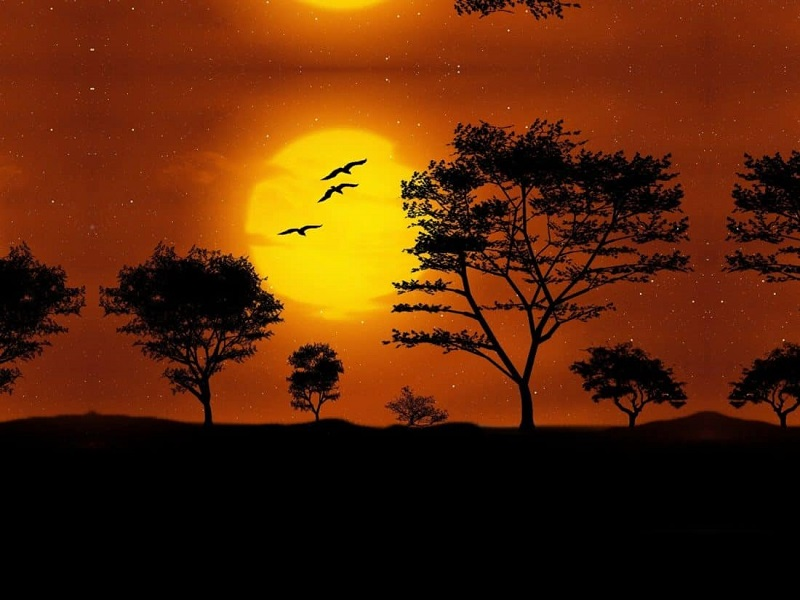

In [3]:
# Load the image, store its dimensions (shape) and display it:
img = cv2.imread("landscape.jpg")
img_shape = img.shape
print(img_shape)
cv2_imshow(img)

The first step is to reshape the image to shape `(MxN,3)`, where `(M, N, 3)` is the shape of the image.

In [4]:
# Reshaping the image:
# If the image contains MxN pixels then the shape of the image is (M, N, 3) 
# so we are reshaping image array to shape (MxN,3):
img = img.reshape((img.shape[1]*img.shape[0], 3))

print("The shape of the 'image' is {}".format(img.shape))
print("Show first values of the 'image':  \n{}".format(img[:10,:]))

The shape of the 'image' is (480000, 3)
Show first values of the 'image':  
[[ 17  44 125]
 [ 23  50 131]
 [ 31  59 143]
 [ 42  70 154]
 [ 13  42 127]
 [ 14  43 128]
 [  9  39 126]
 [ 10  40 127]
 [  7  39 128]
 [  7  39 128]]


In this case, we define the number of clusters equals to the `NUMBER_CLUSTERS` variable.

In [5]:
NUMBER_CLUSTERS = 4

Apply K-Means algorithm to cluster the pixel intensities:

In [6]:
# Apply K-Means clustering algorithm 
# to cluster the pixel intensities of the input image:
kmeans = KMeans(n_clusters=NUMBER_CLUSTERS)
kmeans.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We get the centroids and the labels.

In [7]:
# Get centroids an labels:
# centroids are float numbers. We should convert them to uint8
centroids = kmeans.cluster_centers_
centroids = np.uint8(centroids)
labels = kmeans.labels_

print("Centroids: \n{}".format(centroids))
print("labels.shape: {}".format(labels.shape))
print("First values of labels: \n{}".format(labels[:500]))

Centroids: 
[[  9  82 185]
 [  1   2   7]
 [ 11  41 122]
 [  8 199 246]]
labels.shape: (480000,)
First values of labels: 
[2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

At this point, we can use both the centroids and the labels to form the color quantized resulting image. Note that:

In [8]:
for i, color in enumerate(centroids):
  print("centroids[{}] give us the centroid(color): {}".format(i, color))

centroids[0] give us the centroid(color): [  9  82 185]
centroids[1] give us the centroid(color): [1 2 7]
centroids[2] give us the centroid(color): [ 11  41 122]
centroids[3] give us the centroid(color): [  8 199 246]


Therefore:

(600, 800, 3)


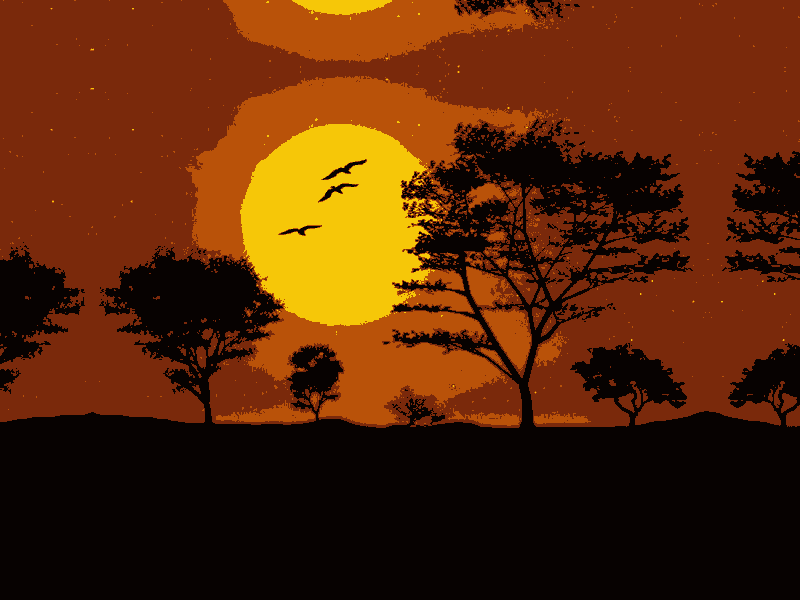

In [9]:
# result = centroids[labels.flatten()]
result = centroids[labels]
result = result.reshape(img_shape)
print(result.shape)
cv2_imshow(result)

We can calculate the percentage of each color based on the number of labels assigned to each pixel.

In [10]:
labels=list(labels)
percent=[]
for i in range(len(centroids)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)

print("Percentages of each color: \n{}".format(percent))
print("[check] sum of all percentages is: '{}'".format(np.sum(percent)))

Percentages of each color: 
[0.11440625, 0.42273125, 0.40123333333333333, 0.061629166666666665]
[check] sum of all percentages is: '1.0'


We can finally show the legend, which should be shown according to the percentages previously calculated.

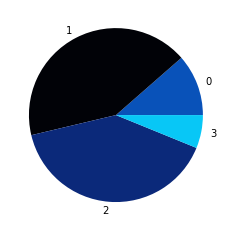

In [11]:
# Now, we can show the legend:
plt.pie(percent, colors=np.array(centroids/255), labels=np.arange(len(centroids)))
plt.show()

As the image is in BGR format (it was loaded using `cv2.imread()`), the centroids are calculated in the same way (as BGR triplets of values). Therefore, if we want to show the previous figure properly, we have to convert the centroids from BGR triplets to RGB triplets.

In [15]:
# Let's explore centroids (both the shape and content)
print(centroids.shape)
print(centroids)

(4, 3)
[[  9  82 185]
 [  1   2   7]
 [ 11  41 122]
 [  8 199 246]]


In [16]:
# Transform centroids from BGR to RGB 
centroids_2 = centroids[:, ::-1]
print(centroids_2)

[[185  82   9]
 [  7   2   1]
 [122  41  11]
 [246 199   8]]


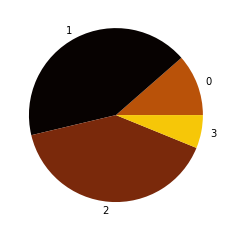

In [17]:
# Now, we can show the legend:
plt.pie(percent, colors=np.array(centroids_2/255), labels=np.arange(len(centroids_2)))
plt.show()

# Conclusions

In this notebook, we have seen how to perform color quantization using scikit-learn using the K-Means clustering algorithm, wich is an unsupervised learning algorithm that automatically clusters data points based on the similarity between them.